In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

In [4]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


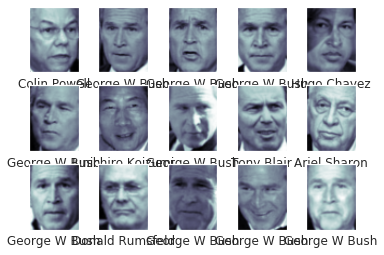

In [6]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

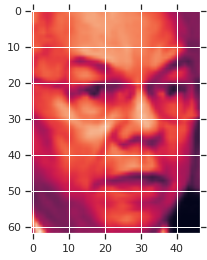

In [7]:
plt.imshow(faces.images[0])

In [10]:
faces.images

array([[[ 138.        ,  135.66667175,  127.66666412, ...,   69.        ,
           68.33333588,   67.33333588],
        [ 146.        ,  139.33332825,  125.        , ...,   68.33333588,
           67.66666412,   67.33333588],
        [ 150.        ,  138.33332825,  124.33333588, ...,   68.33333588,
           67.66666412,   66.66666412],
        ..., 
        [ 153.        ,  174.        ,  110.66666412, ...,    1.66666663,
            0.66666669,    0.66666669],
        [ 122.        ,  193.        ,  167.33332825, ...,    1.33333337,
            1.66666663,    1.33333337],
        [  88.        ,  177.33332825,  206.        , ...,    1.66666663,
            1.66666663,    0.33333334]],

       [[  71.33333588,   56.        ,   67.66666412, ...,   74.33333588,
           89.66666412,   78.66666412],
        [  64.33333588,   61.66666794,   84.33333588, ...,   72.        ,
           87.        ,   78.66666412],
        [  74.        ,   76.        ,   94.33333588, ...,   69.66666412

In [11]:
faces.images.shape

(1348, 62, 47)

In [12]:
ListOfFaces = []
for i in faces.images:
    ListOfFaces.append(np.ravel(i))
arr_face = np.array(ListOfFaces)
print(arr_face)

[[ 138.          135.66667175  127.66666412 ...,    1.66666663
     1.66666663    0.33333334]
 [  71.33333588   56.           67.66666412 ...,  247.66667175  243.
   238.33332825]
 [  84.33333588   97.33333588   72.33333588 ...,  114.          194.33332825
   241.        ]
 ..., 
 [  29.33333397   29.           29.33333397 ...,  145.          147.
   141.66667175]
 [  49.33333206   55.66666794   76.66666412 ...,  186.33332825
   176.33332825  161.        ]
 [  31.           26.33333397   28.         ...,   34.           42.
    69.66666412]]


In [17]:
arr_face.shape

(1348, 2914)

In [57]:
from sklearn.model_selection import train_test_split
X = arr_face
y = faces.target
stratify = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.27, random_state=101, stratify = y)

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [59]:
pred = knn.predict(X_test)

In [60]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, pred))

[[ 12   8   0   1   0   0   0   0]
 [  6  39   1  14   0   1   0   3]
 [  2   9  14   7   0   0   0   1]
 [  5  24   9 100   0   1   0   4]
 [  0   4   5  13   4   0   0   3]
 [  0   4   1   7   0   5   0   2]
 [  0   1   1   2   0   0   9   3]
 [  1   8   3  13   1   0   2  11]]
